# <10 minutes to pandas>

1. object creation; srs, pd
2. viewing data; .head(), .tail(), .index, .columns, .describe(), .T, .sort_index(), .sort_values()
3. selection; .loc[], .at[], .iloc[], .iat[], df[cond], .isin(), [selection] = values
4. missing data; .dropna(), .fillna(), pd.isna(df)
5. operations; .mean(), .shift(n), .apply(func), np.cumsum
6. merge; pd.concat(), pd.merge()
7. grouping; df.groupby().func
8. reshaping; df.stack(), df.unstack(), pd.pivot_table()
9. time series; df.tz_localize(), df.tz_convert(), df.to_period(), df.to_timestamp()
10. categoricals; df[cl].astype('category'), df[cl].cat.set_categories([cat_name(s)])
11. plotting; plt.close('all'), df.plot(), 
12. getting data in/out; df.to_csv(), pd.read_csv(), df.to_excel(). pd.read_excel()

In [1]:
import numpy as np
import pandas as pd
print('np ver = ', np.__version__)
print('pd ver = ', pd.__version__)

np ver =  1.20.1
pd ver =  1.2.4


## 01 object creation

In [2]:
# pd.Series([]); srs 생성
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s # np.nan = null

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# pd.DataFrame((data=, index=, columns=); pd 생성
dates = pd.date_range('20130101', periods=6)
print(dates) # pd.date_range(start, periods=n, freq='a'); freq는 d, w, m

# pd.DataFrame(data=, index=, columns=)
df = pd.DataFrame(np.random.randn(6, 4),
                  index=dates,
                  columns=list('ABCD')
                 )
print(df) # np.random.randn(..., c, b, a); 난수 생성(0축 a, 1축 b, ...)

# dict로 df 구성
df2 = pd.DataFrame({"A": 1.0,
                    "B": pd.Timestamp("20130102"),
                    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
                    "D": np.array([3] * 4, dtype="int32"),
                    "E": pd.Categorical(["test", "train", "test", "train"]),
                    "F": "foo",
                   })
print(df2)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01 -1.040681 -0.423805  0.767968 -1.071810
2013-01-02  0.394346  1.337564  0.494293  0.031408
2013-01-03 -0.050594  2.065219 -1.782539  1.281748
2013-01-04  0.424216 -0.491945 -1.436305  0.511306
2013-01-05  1.681108 -0.038216  0.824232  1.712796
2013-01-06 -1.111114 -1.919108 -0.860147 -1.696951
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


## 02 viewing data

In [4]:
# .head(), .tail(), .index, .columns
print(df.head()); print(df.tail()); print(df.index); print(df.columns)

                   A         B         C         D
2013-01-01 -1.040681 -0.423805  0.767968 -1.071810
2013-01-02  0.394346  1.337564  0.494293  0.031408
2013-01-03 -0.050594  2.065219 -1.782539  1.281748
2013-01-04  0.424216 -0.491945 -1.436305  0.511306
2013-01-05  1.681108 -0.038216  0.824232  1.712796
                   A         B         C         D
2013-01-02  0.394346  1.337564  0.494293  0.031408
2013-01-03 -0.050594  2.065219 -1.782539  1.281748
2013-01-04  0.424216 -0.491945 -1.436305  0.511306
2013-01-05  1.681108 -0.038216  0.824232  1.712796
2013-01-06 -1.111114 -1.919108 -0.860147 -1.696951
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')


In [5]:
# df.to_numpy(); df로 arr 구성
print(df.to_numpy())
print(df2.to_numpy())

[[-1.04068121 -0.42380534  0.76796849 -1.07181029]
 [ 0.3943463   1.33756369  0.49429259  0.0314078 ]
 [-0.05059353  2.0652191  -1.78253935  1.28174774]
 [ 0.42421631 -0.49194486 -1.43630453  0.51130643]
 [ 1.68110811 -0.03821583  0.82423206  1.71279584]
 [-1.11111365 -1.9191084  -0.86014679 -1.69695126]]
[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


In [6]:
# df.describe(); 요약 통계
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.049547,0.088285,-0.332083,0.128083
std,1.045659,1.422217,1.168936,1.324308
min,-1.111114,-1.919108,-1.782539,-1.696951
25%,-0.793159,-0.474910,-1.292265,-0.796006
50%,0.171876,-0.231011,-0.182927,0.271357
75%,0.416749,0.993619,0.699550,1.089137
max,1.681108,2.065219,0.824232,1.712796


In [7]:
# df.T; 행/열 전환
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.040681,0.394346,-0.050594,0.424216,1.681108,-1.111114
B,-0.423805,1.337564,2.065219,-0.491945,-0.038216,-1.919108
C,0.767968,0.494293,-1.782539,-1.436305,0.824232,-0.860147
D,-1.071810,0.031408,1.281748,0.511306,1.712796,-1.696951


In [8]:
# df.sort_index(axis=, ascending=); 인덱스 정렬
df.sort_index(axis=1, ascending=False) # axis= 0 로우, 1 컬럼

,D,C,B,A
2013-01-01,-1.071810,0.767968,-0.423805,-1.040681
2013-01-02,0.031408,0.494293,1.337564,0.394346
2013-01-03,1.281748,-1.782539,2.065219,-0.050594
2013-01-04,0.511306,-1.436305,-0.491945,0.424216
2013-01-05,1.712796,0.824232,-0.038216,1.681108
2013-01-06,-1.696951,-0.860147,-1.919108,-1.111114


In [9]:
# df.sort_values(by=)
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-1.111114,-1.919108,-0.860147,-1.696951
2013-01-04,0.424216,-0.491945,-1.436305,0.511306
2013-01-01,-1.040681,-0.423805,0.767968,-1.071810
2013-01-05,1.681108,-0.038216,0.824232,1.712796
2013-01-02,0.394346,1.337564,0.494293,0.031408
2013-01-03,-0.050594,2.065219,-1.782539,1.281748


## 03 selection

In [10]:
# srs[cl], srs[row], srs[a:b]; srs 접근
print(df['A']) ; print(df['20130102':'20130103']) ; print(df[0:3])

2013-01-01   -1.040681
2013-01-02    0.394346
2013-01-03   -0.050594
2013-01-04    0.424216
2013-01-05    1.681108
2013-01-06   -1.111114
Freq: D, Name: A, dtype: float64
                   A         B         C         D
2013-01-02  0.394346  1.337564  0.494293  0.031408
2013-01-03 -0.050594  2.065219 -1.782539  1.281748
                   A         B         C         D
2013-01-01 -1.040681 -0.423805  0.767968 -1.071810
2013-01-02  0.394346  1.337564  0.494293  0.031408
2013-01-03 -0.050594  2.065219 -1.782539  1.281748


In [11]:
# df.loc[row range, cl range], df.loc[[rows], [cls]]; by label
print(df.loc[:, ['A', 'B']])
print(df.loc['20130102':'20130104', ['A', 'B']]) # 컬럼명 나열 [ ]
print(df.loc['20130102':'20130104', 'A':'B'])

                   A         B
2013-01-01 -1.040681 -0.423805
2013-01-02  0.394346  1.337564
2013-01-03 -0.050594  2.065219
2013-01-04  0.424216 -0.491945
2013-01-05  1.681108 -0.038216
2013-01-06 -1.111114 -1.919108
                   A         B
2013-01-02  0.394346  1.337564
2013-01-03 -0.050594  2.065219
2013-01-04  0.424216 -0.491945
                   A         B
2013-01-02  0.394346  1.337564
2013-01-03 -0.050594  2.065219
2013-01-04  0.424216 -0.491945


In [12]:
# df.iloc[row index range, cl index range], df.iloc[[row indexes], [cl indexes]]; by position
print(df.iloc[3:5, 0:2])
print(df.iloc[[1, 2, 4], [0, 2]])
print(df.iloc[1:3, :])

                   A         B
2013-01-04  0.424216 -0.491945
2013-01-05  1.681108 -0.038216
                   A         C
2013-01-02  0.394346  0.494293
2013-01-03 -0.050594 -1.782539
2013-01-05  1.681108  0.824232
                   A         B         C         D
2013-01-02  0.394346  1.337564  0.494293  0.031408
2013-01-03 -0.050594  2.065219 -1.782539  1.281748


In [13]:
# df[condition], df.isin([value(s)]); boolean indexing
print(df[df['A'] > 0]) # 컬럼에 대해
print(df[df > 0]) # df에 대해

df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2[df2['E'].isin(['two', 'four'])]

                   A         B         C         D
2013-01-02  0.394346  1.337564  0.494293  0.031408
2013-01-04  0.424216 -0.491945 -1.436305  0.511306
2013-01-05  1.681108 -0.038216  0.824232  1.712796
                   A         B         C         D
2013-01-01       NaN       NaN  0.767968       NaN
2013-01-02  0.394346  1.337564  0.494293  0.031408
2013-01-03       NaN  2.065219       NaN  1.281748
2013-01-04  0.424216       NaN       NaN  0.511306
2013-01-05  1.681108       NaN  0.824232  1.712796
2013-01-06       NaN       NaN       NaN       NaN


,A,B,C,D,E
2013-01-03,-0.050594,2.065219,-1.782539,1.281748,two
2013-01-05,1.681108,-0.038216,0.824232,1.712796,four


In [14]:
# .loc[], .at[], .iloc[], .iat[], df[cond], .isin() = values; setting
s1 = pd.Series(list(range(1, 7)),
               index=pd.date_range('20130101', periods=6)
              )
df['F'] = s1; print(df)

df.at[dates[0], 'A'] = 0
df.iat[0, 1] = 0
df.loc[:, 'D'] = 5
print(df)

df2 = df.copy()
df2[df2 > 0] = - df2 # 음수로 바꾸기
print(df2)

                   A         B         C         D  F
2013-01-01 -1.040681 -0.423805  0.767968 -1.071810  1
2013-01-02  0.394346  1.337564  0.494293  0.031408  2
2013-01-03 -0.050594  2.065219 -1.782539  1.281748  3
2013-01-04  0.424216 -0.491945 -1.436305  0.511306  4
2013-01-05  1.681108 -0.038216  0.824232  1.712796  5
2013-01-06 -1.111114 -1.919108 -0.860147 -1.696951  6
                   A         B         C  D  F
2013-01-01  0.000000  0.000000  0.767968  5  1
2013-01-02  0.394346  1.337564  0.494293  5  2
2013-01-03 -0.050594  2.065219 -1.782539  5  3
2013-01-04  0.424216 -0.491945 -1.436305  5  4
2013-01-05  1.681108 -0.038216  0.824232  5  5
2013-01-06 -1.111114 -1.919108 -0.860147  5  6
                   A         B         C  D  F
2013-01-01  0.000000  0.000000 -0.767968 -5 -1
2013-01-02 -0.394346 -1.337564 -0.494293 -5 -2
2013-01-03 -0.050594 -2.065219 -1.782539 -5 -3
2013-01-04 -0.424216 -0.491945 -1.436305 -5 -4
2013-01-05 -1.681108 -0.038216 -0.824232 -5 -5
2013-01-06 

## 04 missing data

In [15]:
# df.dropna(how=), df.fillna(value=), pd.isna(df)

# df.reindex(index=row range, columns=); 인덱스 재설정
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
print(df1)

# df.dropna(how=); how='any' nan 행/열만, 'all' 모든 값이 NaN일 때만
print(df1.dropna(how='any'))

# df.fillna(value=)
print(df1.fillna(value=5))

# pd.isna(df); nan T/F
print(pd.isna(df1))

                   A         B         C  D  F    E
2013-01-01  0.000000  0.000000  0.767968  5  1  1.0
2013-01-02  0.394346  1.337564  0.494293  5  2  1.0
2013-01-03 -0.050594  2.065219 -1.782539  5  3  NaN
2013-01-04  0.424216 -0.491945 -1.436305  5  4  NaN
                   A         B         C  D  F    E
2013-01-01  0.000000  0.000000  0.767968  5  1  1.0
2013-01-02  0.394346  1.337564  0.494293  5  2  1.0
                   A         B         C  D  F    E
2013-01-01  0.000000  0.000000  0.767968  5  1  1.0
2013-01-02  0.394346  1.337564  0.494293  5  2  1.0
2013-01-03 -0.050594  2.065219 -1.782539  5  3  5.0
2013-01-04  0.424216 -0.491945 -1.436305  5  4  5.0
                A      B      C      D      F      E
2013-01-01  False  False  False  False  False  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True


## 05 opertaions

In [16]:
# df.mean()
print(df.mean()) # 컬럼별로 평균
print(df.mean(1)) # 로우별로 평균

A    0.222994
B    0.158919
C   -0.332083
D    5.000000
F    3.500000
dtype: float64
2013-01-01    1.353594
2013-01-02    1.845241
2013-01-03    1.646417
2013-01-04    1.499193
2013-01-05    2.493425
2013-01-06    1.421926
Freq: D, dtype: float64


In [17]:
# df.shift(n); 로우 n칸 미룸
s = pd.Series([1, 3, 4, np.nan, 6, 8], index=dates).shift(3); print(s)

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    NaN
2013-01-04    1.0
2013-01-05    3.0
2013-01-06    4.0
Freq: D, dtype: float64


In [18]:
# df.apply(); 함수 적용
print(df.apply(np.cumsum)) # np.cumsum 누적합
print(df.apply(lambda x: x.max() - x.min())) # 최댓값-최솟값

                   A         B         C   D   F
2013-01-01  0.000000  0.000000  0.767968   5   1
2013-01-02  0.394346  1.337564  1.262261  10   3
2013-01-03  0.343753  3.402783 -0.520278  15   6
2013-01-04  0.767969  2.910838 -1.956583  20  10
2013-01-05  2.449077  2.872622 -1.132351  25  15
2013-01-06  1.337964  0.953514 -1.992498  30  21
A    2.792222
B    3.984328
C    2.606771
D    0.000000
F    5.000000
dtype: float64


## 06 merge

In [19]:
# pd.concat()
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]; print(pieces)

pd.concat(pieces)

[          0         1         2         3
0 -0.402555  1.614461  0.804663 -1.606028
1  1.055584  0.083502 -0.532667 -0.128485
2  0.129218 -1.159007 -1.057525  1.564745,           0         1         2         3
3 -0.847872  1.593359  1.486014 -0.103301
4  1.016013 -0.284078  0.806522 -0.760916
5  0.780000 -0.239949 -0.830167  0.465386
6  1.289103  0.292134  0.975687  0.888246,           0         1         2         3
7 -0.546392  1.317415 -1.431002  0.439248
8  1.393793 -2.095577 -1.105078 -2.062545
9  1.076828 -0.762394 -1.556025  1.959335]


,0,1,2,3
0,-0.402555,1.614461,0.804663,-1.606028
1,1.055584,0.083502,-0.532667,-0.128485
2,0.129218,-1.159007,-1.057525,1.564745
3,-0.847872,1.593359,1.486014,-0.103301
4,1.016013,-0.284078,0.806522,-0.760916
5,0.780000,-0.239949,-0.830167,0.465386
6,1.289103,0.292134,0.975687,0.888246
7,-0.546392,1.317415,-1.431002,0.439248
8,1.393793,-2.095577,-1.105078,-2.062545
9,1.076828,-0.762394,-1.556025,1.959335


In [20]:
# pd.merge(df1, df2, ..., on=)
left = pd.DataFrame({'key':['foo', 'bar'], 'lval':[1, 2]}); print(left)
right = pd.DataFrame({'key':['foo', 'bar'], 'rval':[4, 5]}); print(right)
print(pd.merge(left, right, on='key')) # on= 'label', 'list'

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5
   key  lval  rval
0  foo     1     4
1  bar     2     5


## 07 grouping

In [21]:
# df.groupby([cl(s)]).sum()
df = pd.DataFrame({"A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
                   "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
                   "C": np.random.randn(8),
                   "D": np.random.randn(8),
                  })
print(df.groupby('A').sum())
print(df.groupby(['A', 'B']).sum())

            C         D
A                      
bar -1.639174  2.067341
foo  0.604833 -0.370922
                  C         D
A   B                        
bar one   -0.069406 -1.002231
    three -0.017469  1.636715
    two   -1.552299  1.432856
foo one    0.941522 -1.064341
    three  0.058915  0.715968
    two   -0.395604 -0.022549


## 08 reshaping

In [22]:
# df.stack(); 컬럼을 인덱스화하여 나열(역pivot)
tuples = list(zip( * [["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
                      ["one", "two", "one", "two", "one", "two", "one", "two"],
                     ])); print(tuples)
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second']); print(index)
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B']); print(df)
df2 = df[:4]; print(df2)

stacked = df2.stack(); stacked

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])
                     A         B
first second                    
bar   one     0.504326 -0.115576
      two    -0.778492  0.354113
baz   one     0.338129 -1.462535
      two    -0.170643 -0.738421
foo   one    -0.304465  0.838840
      two    -0.165110 -0.879992
qux   one    -0.095577 -1.066435
      two    -0.744810  0.565908
                     A         B
first second                    
bar   one     0.504326 -0.115576
      two    -0.778492  0.354113
baz   one     0.338129 -1.462535
      two    -0.170643 -0.738421


first  second   
bar    one     A    0.504326
               B   -0.115576
       two     A   -0.778492
               B    0.354113
baz    one     A    0.338129
               B   -1.462535
       two     A   -0.170643
               B   -0.738421
dtype: float64

In [23]:
# df.unstack()
print(stacked.unstack()) # last level(기본값)
print(stacked.unstack(1))
print(stacked.unstack(0))

                     A         B
first second                    
bar   one     0.504326 -0.115576
      two    -0.778492  0.354113
baz   one     0.338129 -1.462535
      two    -0.170643 -0.738421
second        one       two
first                      
bar   A  0.504326 -0.778492
      B -0.115576  0.354113
baz   A  0.338129 -0.170643
      B -1.462535 -0.738421
first          bar       baz
second                      
one    A  0.504326  0.338129
       B -0.115576 -1.462535
two    A -0.778492 -0.170643
       B  0.354113 -0.738421


In [24]:
# pd.pivot_table(df, values=[], index=[], columns=[])
df = pd.DataFrame({"A": ["one", "one", "two", "three"] * 3,
                   "B": ["A", "B", "C"] * 4,
                   "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
                   "D": np.random.randn(12),
                   "E": np.random.randn(12),
                  }); print(df)

print(pd.pivot_table(df, values=['D'], index=['A', 'B'], columns=['C']))

        A  B    C         D         E
0     one  A  foo  0.094155  1.519118
1     one  B  foo  0.282472 -1.469100
2     two  C  foo -1.021155 -1.104225
3   three  A  bar -0.227920  0.065541
4     one  B  bar -0.305020 -0.584389
5     one  C  bar -0.390189 -0.677072
6     two  A  foo  1.321365 -2.387571
7   three  B  foo -0.160839 -0.027855
8     one  C  foo -0.899023 -1.386082
9     one  A  bar  1.622699 -0.416250
10    two  B  bar  0.010599  0.596247
11  three  C  bar  1.051264 -0.978940
                D          
C             bar       foo
A     B                    
one   A  1.622699  0.094155
      B -0.305020  0.282472
      C -0.390189 -0.899023
three A -0.227920       NaN
      B       NaN -0.160839
      C  1.051264       NaN
two   A       NaN  1.321365
      B  0.010599       NaN
      C       NaN -1.021155


## 09 time series

In [25]:
# df.tz_localize(); 해당 시각 적용
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng); print(ts)

ts_utc = ts.tz_localize('UTC'); ts_utc

2012-03-06    2.181496
2012-03-07    1.906129
2012-03-08    0.751885
2012-03-09   -0.706155
2012-03-10   -0.720568
Freq: D, dtype: float64


2012-03-06 00:00:00+00:00    2.181496
2012-03-07 00:00:00+00:00    1.906129
2012-03-08 00:00:00+00:00    0.751885
2012-03-09 00:00:00+00:00   -0.706155
2012-03-10 00:00:00+00:00   -0.720568
Freq: D, dtype: float64

In [26]:
# df.tz_convert(); 시각 변환
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    2.181496
2012-03-06 19:00:00-05:00    1.906129
2012-03-07 19:00:00-05:00    0.751885
2012-03-08 19:00:00-05:00   -0.706155
2012-03-09 19:00:00-05:00   -0.720568
Freq: D, dtype: float64

In [27]:
# df.to_period(); 기간 합산
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)

ps = ts.to_period()
print(ps)

2012-01-31   -0.821564
2012-02-29   -0.184441
2012-03-31    0.156122
2012-04-30   -2.102581
2012-05-31   -1.436309
Freq: M, dtype: float64
2012-01   -0.821564
2012-02   -0.184441
2012-03    0.156122
2012-04   -2.102581
2012-05   -1.436309
Freq: M, dtype: float64


In [28]:
# df.to_timestamp()
ps.to_timestamp()

2012-01-01   -0.821564
2012-02-01   -0.184441
2012-03-01    0.156122
2012-04-01   -2.102581
2012-05-01   -1.436309
Freq: MS, dtype: float64

## 10 categoricals

In [29]:
# df[cl].astype('category'); 데이터 타입 변환
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ["a", "b", "b", "a", "a", "e"]
                  })
print(df)

df['grade'] = df['raw_grade'].astype('category') # 데이터 타입 카테고리
print(df['grade'])

   id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e
0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']


In [30]:
# df[cl].cat.categories = cat_name; 카테고리 이름 부여
df['grade'].cat.categories = ['very good', 'good', 'very bad']
print(df['grade'])

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']


In [31]:
# df[cl].cat.set_categories([cat_name(s)])
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

## 11 plotting

In [32]:
# plt.close('all')
import matplotlib.pyplot as plt
plt.close('all')

2000-01-01    0.501846
2000-01-02   -0.294577
2000-01-03    0.002734
2000-01-04    0.816949
2000-01-05   -0.495870
                ...   
2002-09-22   -1.196240
2002-09-23    2.289364
2002-09-24   -0.832516
2002-09-25   -0.822160
2002-09-26    1.346032
Freq: D, Length: 1000, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
2000-01-01     0.501846
2000-01-02     0.207269
2000-01-03     0.210003
2000-01-04     1.026952
2000-01-05     0.531082
                ...    
2002-09-22    39.358560
2002-09-23    41.647924
2002-09-24    40.815408
2002-09-25    39.993248
2002-09-26    41.339280
Freq: D, Length: 1000, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


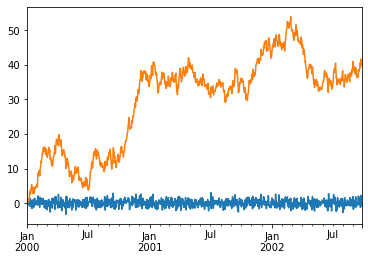

In [33]:
# df.plot()
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000)
              )
print(ts)
print(ts.plot())

ts = ts.cumsum() # 왜 누적합 후 처리? 난수를 발생시켰기 때문에 의미있는 시각화를 위해
print(ts)

print(ts.plot())

In [34]:
#  plt.figure(); plt 형태
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index,
                  columns=["A", "B", "C", "D"]
                 )
print(df)

df = df.cumsum()
print(df)

plt.figure()

                   A         B         C         D
2000-01-01 -0.213536 -0.043421 -0.129232  0.437628
2000-01-02  0.010222 -0.479828 -0.637117  0.501607
2000-01-03  0.408346 -0.531166  1.269888 -0.510323
2000-01-04  1.011202  0.923584  0.248319  0.135390
2000-01-05 -0.930269  1.475786  0.401484  0.274076
...              ...       ...       ...       ...
2002-09-22 -0.841994 -0.404300  0.239847  1.724193
2002-09-23 -0.344040  0.463219 -0.841158  0.179817
2002-09-24 -0.885402 -0.837964  0.291930  0.407761
2002-09-25  0.400676 -0.080598  0.953031 -0.841302
2002-09-26  0.840459  0.002750 -0.664379 -0.324723

[1000 rows x 4 columns]
                    A         B          C          D
2000-01-01  -0.213536 -0.043421  -0.129232   0.437628
2000-01-02  -0.203314 -0.523249  -0.766349   0.939236
2000-01-03   0.205032 -1.054415   0.503539   0.428913
2000-01-04   1.216234 -0.130831   0.751858   0.564303
2000-01-05   0.285965  1.344955   1.153341   0.838379
...               ...       ...        

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

AxesSubplot(0.125,0.125;0.775x0.755)


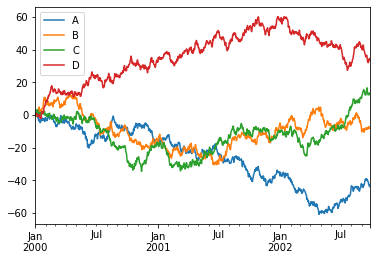

In [35]:
# plt.legend(loc=)
print(df.plot())
plt.legend(loc='best')

## 12 getting data in/out

In [36]:
# df.to_csv('file_name'), pd.read_csv('file_dir')
df.to_csv('foo.csv')
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.213536,-0.043421,-0.129232,0.437628
1,2000-01-02,-0.203314,-0.523249,-0.766349,0.939236
2,2000-01-03,0.205032,-1.054415,0.503539,0.428913
3,2000-01-04,1.216234,-0.130831,0.751858,0.564303
4,2000-01-05,0.285965,1.344955,1.153341,0.838379
...,...,...,...,...,...
995,2002-09-22,-42.644131,-7.796991,13.118188,33.967323
996,2002-09-23,-42.988171,-7.333772,12.277030,34.147140
997,2002-09-24,-43.873573,-8.171737,12.568960,34.554901
998,2002-09-25,-43.472897,-8.252335,13.521991,33.713600


In [37]:
# df.to_excel('file_name', sheet_name=)
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [38]:
# pd.read_excel('file_dir', 'sheet_name', index_col=None, na_values=[])
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.213536,-0.043421,-0.129232,0.437628
1,2000-01-02,-0.203314,-0.523249,-0.766349,0.939236
2,2000-01-03,0.205032,-1.054415,0.503539,0.428913
3,2000-01-04,1.216234,-0.130831,0.751858,0.564303
4,2000-01-05,0.285965,1.344955,1.153341,0.838379
...,...,...,...,...,...
995,2002-09-22,-42.644131,-7.796991,13.118188,33.967323
996,2002-09-23,-42.988171,-7.333772,12.277030,34.147140
997,2002-09-24,-43.873573,-8.171737,12.568960,34.554901
998,2002-09-25,-43.472897,-8.252335,13.521991,33.713600
